In [184]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cmap

In [185]:
def slices(array, n):
    data = []
    for i in range(0, 100, n):
        slice = array[:, :, i:i + n].sum(axis=2) // n
        data.append(slice)
    
    return data


In [186]:
def getVFile(fileCount):
    data = []
    for i in range(0, fileCount):
        name = "Data\\Vf0" + str(i + 1) + ".bin";
        data.append(name)
    return data

In [187]:
def getUFile(fileCount):
    data = []
    for i in range(0, fileCount):
        name = "Data\\Uf0" + str(i + 1) + ".bin";
        data.append(name)
    return data


In [188]:
def calMagnitude(u, v):
    data = np.sqrt(np.square(u) + np.square(v))
    u = u//data
    v = v//data
    data = np.float32(data)
    return data, u, v


c:\users\vivek\onedrive - iiit bangalore\m.tech cse\main course\sem 3\data visualization\assignments\assignment 1\venv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
c:\users\vivek\onedrive - iiit bangalore\m.tech cse\main course\sem 3\data visualization\assignments\assignment 1\venv\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in floor_divide
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\vivek\onedrive - iiit bangalore\m.tech cse\main course\sem 3\data visualization\assignments\assignment 1\venv\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in floor_divide
  after removing the cwd from sys.path.


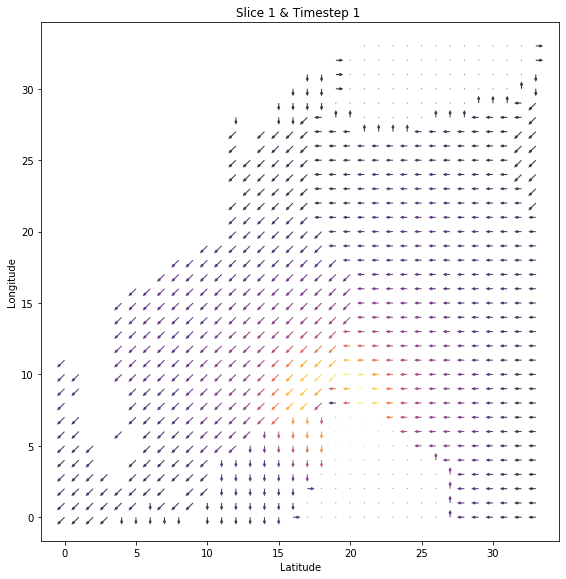

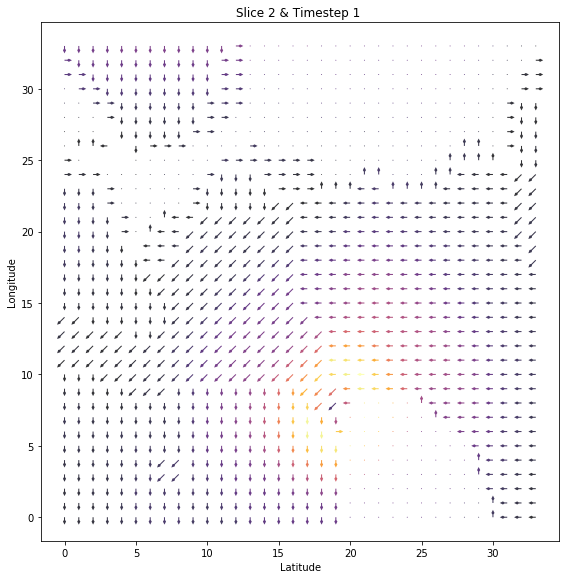

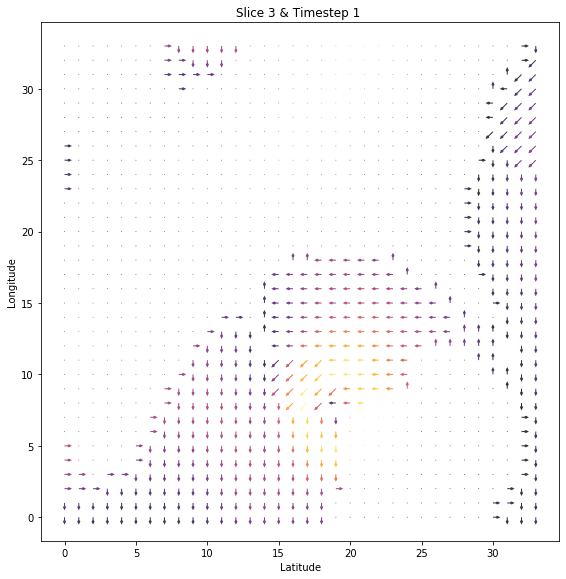

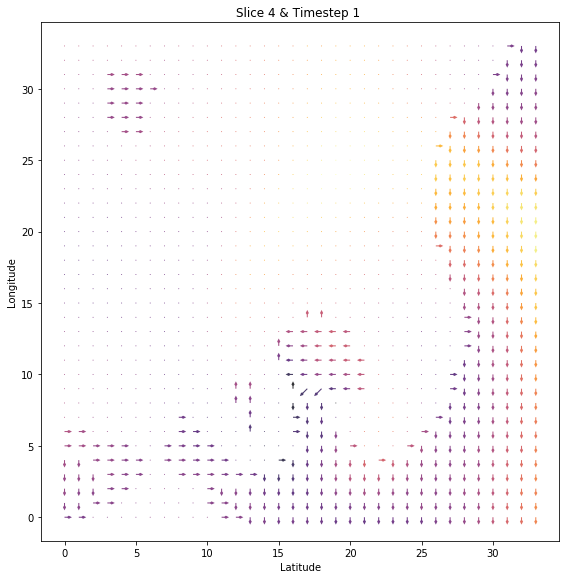

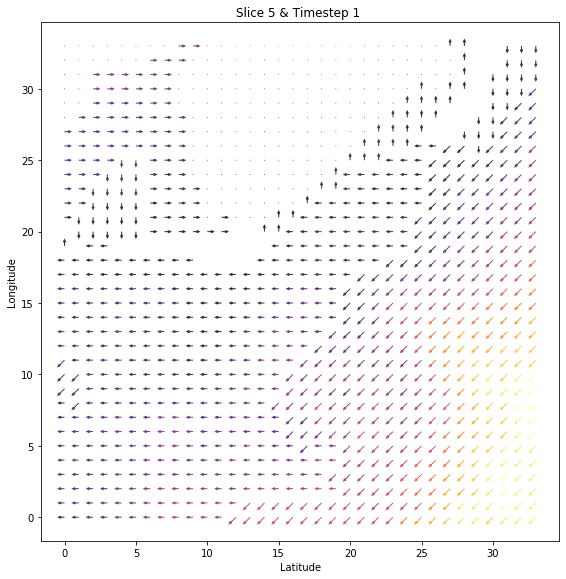

In [196]:
numFiles = 1
Vfile = getVFile(numFiles)
Ufile = getUFile(numFiles)
n = 20
rows = 100 // n
timestep = 1

for i in range(numFiles):

    with open(Vfile[i], "rb") as f:
        arr1 = np.fromfile(f, dtype='>f')
        arr1 = np.reshape(arr1, (500, 500, 100), order="F")

    with open(Ufile[i], "rb") as f:
        arr2 = np.fromfile(f, dtype='>f')
        arr2 = np.reshape(arr2, (500, 500, 100), order="F")
        
    vSlices = slices(arr1, n)
    uSlices = slices(arr2, n)
    
    for j in range(0, rows):
        mag, u, v = calMagnitude(uSlices[j], vSlices[j])
        fig, ax = plt.subplots(figsize=(4, 4))
        fig.subplots_adjust(bottom=0.2, right=2, top=2)
        u=u[::-1]
        v=v[::-1]
        mag=mag[::-1]
        fig.subplots_adjust(bottom=0.2, right=2.5, top=2)
        ax.quiver( u[::15,::15],v[::15,::15], mag[::15,::15], scale = 70 , width = 0.002,cmap=cmap.inferno, alpha=0.8 , headlength=3)
        ax.set_aspect('equal')
        # ax.quiver( u,v, mag, scale = 70 , width = 0.002,cmap=cmap.jet,headlength=3)
        plt.title("Slice %s & Timestep %s "%(j+1, timestep))
        plt.xlabel("Latitude")
        plt.ylabel("Longitude")
        plt.show()
    timestep += 1